In [1]:
import numpy as np
import pandas as pd

In [2]:
data= pd.read_csv("aug_train.csv")

In [3]:
data.drop(['enrollee_id','company_size'], axis= 1, inplace= True)

In [4]:
data['city']= data['city'].apply(lambda c: int(c[5:]))

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  int64  
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   company_type            13018 non-null  object 
 9   last_new_job            18735 non-null  object 
 10  training_hours          19158 non-null  int64  
 11  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 1.8+ MB


In [6]:
numeric_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])
print("Number of numerical variables: ", numeric_data.shape[1])
print("Numerical attributes: ", numeric_data.columns)

Number of numerical variables:  4
Numerical attributes:  Index(['city', 'city_development_index', 'training_hours', 'target'], dtype='object')


In [7]:
print("Number of categorical variables: ", categorical_data.shape[1])
print("Categorical attributes: ")
print(categorical_data.columns)

Number of categorical variables:  8
Categorical attributes: 
Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_type',
       'last_new_job'],
      dtype='object')


In [8]:
data.dropna(inplace= True)

In [9]:
data['gender'].replace({'Male': 0, 'Female': 1, 'Other': 2}, inplace= True)

In [10]:
data['relevent_experience'].replace({'No relevent experience': 0, 'Has relevent experience': 1}, inplace= True)

In [11]:
data['enrolled_university'].replace({'no_enrollment': 0, 'Part time course': 1, 'Full time course': 2}, inplace= True)

In [12]:
data['education_level'].replace({'Graduate': 0, 'Masters': 1, 'Phd': 2}, inplace= True)

In [13]:
data['major_discipline'].replace({'STEM': 0, 'Humanities': 1, 'Business Degree': 2, 'Other': 3, 'No Major': 4, 'Arts': 5}, inplace= True)

In [14]:
data['experience'].replace({'>20': '21', '<1': '0'}, inplace= True)
data['experience']= pd.to_numeric(data['experience'])

In [15]:
data['company_type'].replace({'Pvt Ltd': 0, 'Funded Startup': 1, 'Early Stage Startup': 2, 'Public Sector': 3, 'NGO': 4, 'Other': 5}, inplace= True)

In [17]:
data['last_new_job'].replace({'>4': '5', 'never': '0'}, inplace= True)
data['last_new_job']= pd.to_numeric(data['last_new_job'])

In [18]:
data

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target
1,40,0.776,0,0,0,0,0,15,0,5,47,0.0
4,162,0.767,0,1,0,1,0,21,1,4,8,0.0
7,46,0.762,0,1,0,0,0,13,0,5,18,1.0
8,103,0.920,0,1,0,0,0,7,0,1,46,1.0
11,103,0.920,0,1,0,0,0,5,0,1,108,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19147,21,0.624,0,0,2,0,0,1,0,1,52,1.0
19149,103,0.920,0,1,0,1,0,9,0,1,36,1.0
19150,160,0.920,1,1,0,0,0,10,3,3,23,0.0
19152,103,0.920,1,1,0,0,1,7,1,1,25,0.0


In [19]:
from sklearn import preprocessing
#Feature scaling - min max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)
encD = data
encD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9238 entries, 1 to 19155
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    9238 non-null   int64  
 1   city_development_index  9238 non-null   float64
 2   gender                  9238 non-null   int64  
 3   relevent_experience     9238 non-null   int64  
 4   enrolled_university     9238 non-null   int64  
 5   education_level         9238 non-null   int64  
 6   major_discipline        9238 non-null   int64  
 7   experience              9238 non-null   int64  
 8   company_type            9238 non-null   int64  
 9   last_new_job            9238 non-null   int64  
 10  training_hours          9238 non-null   int64  
 11  target                  9238 non-null   float64
dtypes: float64(2), int64(10)
memory usage: 938.2 KB


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9238 entries, 1 to 19155
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    9238 non-null   int64  
 1   city_development_index  9238 non-null   float64
 2   gender                  9238 non-null   int64  
 3   relevent_experience     9238 non-null   int64  
 4   enrolled_university     9238 non-null   int64  
 5   education_level         9238 non-null   int64  
 6   major_discipline        9238 non-null   int64  
 7   experience              9238 non-null   int64  
 8   company_type            9238 non-null   int64  
 9   last_new_job            9238 non-null   int64  
 10  training_hours          9238 non-null   int64  
 11  target                  9238 non-null   float64
dtypes: float64(2), int64(10)
memory usage: 938.2 KB


In [21]:
#Train the Model
#Split into input attributes and target
cols=['city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'major_discipline', 'experience', 'company_type', 'last_new_job', 'training_hours']
X=encD[cols]
y=encD['target']
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9238 entries, 1 to 19155
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  9238 non-null   float64
 1   gender                  9238 non-null   int64  
 2   relevent_experience     9238 non-null   int64  
 3   enrolled_university     9238 non-null   int64  
 4   major_discipline        9238 non-null   int64  
 5   experience              9238 non-null   int64  
 6   company_type            9238 non-null   int64  
 7   last_new_job            9238 non-null   int64  
 8   training_hours          9238 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 721.7 KB


In [22]:
#Split into train and test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40) 

In [23]:
#Train the model
from sklearn.naive_bayes import GaussianNB 
gNBmodel = GaussianNB() 
gNBmodel.fit(X_train,y_train) 

GaussianNB()

In [24]:
y_pred = gNBmodel.predict(X_test)
y_pred

array([0., 0., 0., ..., 1., 0., 1.])

In [25]:
print('Accuracy of Gaussian Naive Bayes on test set: {:.2f}'.format
(gNBmodel.score(X_test, y_test))) 

Accuracy of Gaussian Naive Bayes on test set: 0.82


In [26]:
from sklearn.metrics import mean_absolute_error
y_train_pred = gNBmodel.predict(X_train) 
mae_train = mean_absolute_error(y_train, y_train_pred) 
mae_test = mean_absolute_error(y_test, y_pred) 
print(mae_train) 
print(mae_test) 

0.189851150202977
0.17857142857142858


In [32]:
if mae_train < mae_test:
    print("Overfitting is present")
else:
    print("Underfitting is present")

Underfitting is present


In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) 

array([[1348,  191],
       [ 139,  170]], dtype=int64)

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.88      0.89      1539
         1.0       0.47      0.55      0.51       309

    accuracy                           0.82      1848
   macro avg       0.69      0.71      0.70      1848
weighted avg       0.83      0.82      0.83      1848



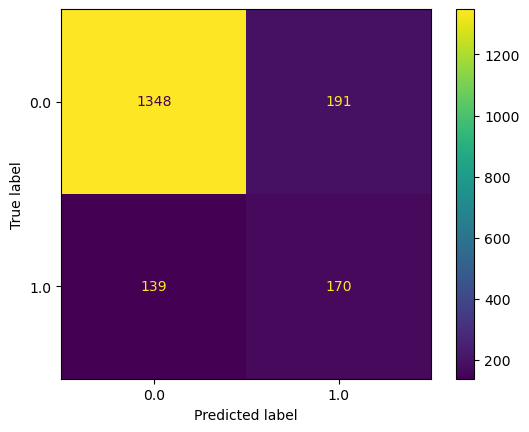

In [34]:
#Analyse model performance visually
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=gNBmodel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=gNBmodel.classes_)
disp.plot()

<b>Multinomial NB</b>

In [37]:
#Train the model
from sklearn.naive_bayes import MultinomialNB 
mNBmodel = MultinomialNB() 
mNBmodel.fit(X_train,y_train) 

MultinomialNB()

In [38]:
y_pred = mNBmodel.predict(X_test)
y_pred

array([0., 0., 0., ..., 1., 0., 0.])

In [40]:
print('Accuracy of Multinomial Naive Bayes on test set:{:.2f}'.format(mNBmodel.score(X_test, y_test))) 

Accuracy of Multinomial Naive Bayes on test set:0.69


In [41]:
from sklearn.metrics import mean_absolute_error
y_train_pred = mNBmodel.predict(X_train) 
mae_train = mean_absolute_error(y_train, y_train_pred) 
mae_test = mean_absolute_error(y_test, y_pred) 
print(mae_train) 
print(mae_test)

0.30013531799729365
0.3051948051948052


In [42]:
if mae_train < mae_test:
 print("Overfitting is present") 
else: 
 print("Underfitting is present") 

Overfitting is present


In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1194,  345],
       [ 219,   90]], dtype=int64)

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.78      0.81      1539
         1.0       0.21      0.29      0.24       309

    accuracy                           0.69      1848
   macro avg       0.53      0.53      0.53      1848
weighted avg       0.74      0.69      0.71      1848

